# 誤差逆伝播法

- これまでの計算グラフのおさらい
<br><br>
<img src = ".\img5-5\5-17リンゴ2個とミカン3個の買い物.png" width="500" height="800">
<br><br>
順伝播→"×"に対しては、順伝播の入力値をひっくり返した値を乗算して下流へ   
逆伝播→"+"に対しては、逆伝播では、そのままの値を下流へ

## 5.5 活性化関数レイヤの実装

前回学んだ、計算グラフの考え方をニューラルネットワークに適用します。ここでは、ニューラルネットワークを構成する「層（レイヤ）」をひとつのクラスとして実装しています。

### 5.5.1 ReLuレイヤ


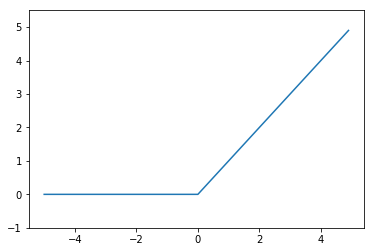

In [109]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

活性化関数として使われるReLu（Rectified Linear Unit)は、次の式(5.7)で表されました（教科書P51,3.2.7 ReLu関数参照）
  
$$y =
\left\{
\begin{array}{}
x & (x > 0) \\
0 & (x \leq 0)
\end{array}
\right.$$<div style="text-align: right;">(5.7)</div></p>

微分すると下記のようになる。
$$\frac{\partial y}{\partial x} =
\left\{
\begin{array}{}
1 & (x > 0) \\
0 & (x \leq 0)
\end{array}
\right.$$<div style="text-align: right;">(5.8)</div></p>

この式を見ると以下のことが分かる。
- 順伝播時の入力である$x$が0より大きければ，逆伝播は上流の値をそのまま下流に流す
- 逆に，$x$が0以下であれば，逆伝播時に下流への信号をそこでストップする

<img src = ".\img5-5\fig5-18.png" width="500" height="800">
<div style="text-align: right;"></p>図5-18 ReLUレイヤの計算グラフ</div>

In [110]:
# coding: utf-8
#皆さんの、deep-learning-from-scratch-masterフォルダの置いてある場所を指定してください
import sys
sys.path.append('/Users/Coy/Documents/Statistics/Statistics Semi/make_DeepLearning_from_scrach/deep-learning-from-scratch-master')


import numpy as np
from common.functions import *
from common.util import im2col, col2im


        self.mask = (x <=0 ) #  x <=0　の場合、True, それ以外はFalse を渡す
        out = x.copy() #  xの値（配列）をコピーする
        out[self.mask] = 0 # True の要素の値のみを０のに変換する
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0　# x<=0がtrue のものは、逆伝播の微分のdoutも0で流す(それ以外はそのまま流す。)
        dx = dout
        
        return dx

IndentationError: unexpected indent (<ipython-input-110-c946616b4b52>, line 12)

ReLUクラスは、インスタンス変数としてmaskという変数を持ち、True/FalseからなるNumPy配列である.  
$x$の要素で0以下の場所をTrue,それ以外(0より大きい要素)をFalseとして保持します。

In [111]:
x = np.array( [[1.0,-0.5], [-2.0,3.0]] )
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [112]:
mask = (x <=0)
print(mask)

[[False  True]
 [ True False]]


In [113]:
out = x.copy()
print("xの配列")
print(out)
out[mask] = 0
print("maskがTrueの値（つまり0以下の値）だけ、0を代入")
print(out)

xの配列
[[ 1.  -0.5]
 [-2.   3. ]]
maskがTrueの値（つまり0以下の値）だけ、0を代入
[[ 1.  0.]
 [ 0.  3.]]


In [114]:
x2 =np.array([1,2,3,-1,-2,-3])
print("入力値(x)")
print(x2)
relu_cul =Relu()

print("Reluレイヤのforward処理")
forward_x2 = relu_cul.forward(x2)
print("Reluレイヤのbackword処理")
backward_x2 = relu_cul.backward(x2)

入力値(x)
[ 1  2  3 -1 -2 -3]
Reluレイヤのforward処理
[1 2 3 0 0 0]
Reluレイヤのbackword処理
[1 2 3 0 0 0]


図5-18で示すように、順伝播時の入力が0以下ならば、逆伝播の値は0になります。  
そのため、逆伝播では、順伝播時に保持したmaskを使って上流から伝播されたdoutに対して、maskの要素がTrueの場所を0にします.

ReLUレイヤは回路におけるスイッチのようにはたらき、
- 順伝播時に電流が流れていればONにし，流れなければスイッチをOFFにする
- 逆伝播時には，スイッチがONであれば電流がそのまま流れ，OFFであればそれ以上電流は流れない．

### Sigmoidレイヤ

Sigmoid関数は下記で表される
$$y =
\frac{1}{1 + \exp(-x)}$$<div style="text-align: right;">(5.9)</div></p>


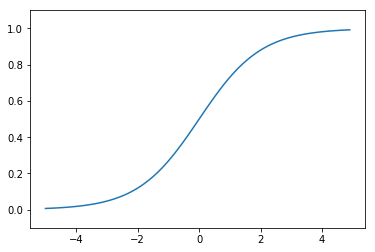

In [115]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

式(5.9)を計算グラフで表すと、次の図5-19のようになります。

<img src = ".\img5-5\fig5-19.png" width="800" height="300">
<div style="text-align: right;"></p>図5-19 Sigmoidレイヤの計算グラフ（順伝播のみ）</div>

- expノード：$y = exp(x)$の計算を行う
- /ノード：$y =\dfrac{1}{x}$の計算を行う
   
図5-19のように、式(5.9)の計算は、局所的な計算の伝播によって構成されています。  
次に、図5-19の逆伝播を見ていきます。
  
1. ステップ１  
「/」ノードは、$y =\dfrac{1}{x}$を表しますが、この微分は解析的に次の式にとなる。  
  
$$y'=\left( -1\right) x^{\left( -1-1\right) }$$
$$=-x^{\left( -2\right) }=-\dfrac {1}{x^{2}}=-y^2$$<div style="text-align: right;">(5.10)</div></p>
  
式(5.9)より、逆伝播のときは、上流の値に対して、$-y^2$（順伝播の出力の2乗にマイナスをつけた値）を乗算して下流へ伝播  
  
2. ステップ２  
「＋」ノードはそのまま下流に値を流すだけ  
    
      
3. ステップ３  
[$exp$」ノードは、$y=exp(x)$を表し、その微分は次の式で表されます(微分でも形は変わらない） 
  
$$\dfrac {\partial y}{\partial x}=exp\left( x\right)$$<div style="text-align: right;">(5.11)</div></p>    
      
4. ステップ４  
「×」ノードは、順伝播時の値を、"ひっくり返して"乗算する（ここでは、−１を乗算）  
  
  

<img src = ".\img5-5\fig5-20.png" width="800" height="300">
<div style="text-align: right;"></p>図5-20 Sigmoidレイヤの計算グラフ</div>

図5-20の結果から、逆伝播の出力は、$\dfrac {\partial L}{\partial y}y^{2}exp\left( -x\right)$となり、この値が下流にあるノードに伝播していきます。<br>ここでは、$\dfrac {\partial L}{\partial y}y^{2}exp\left( -x\right)$という値が、<font color="#ea5550">順伝播の入力$x$と、出力$y$だけから計算できる点に注目しましょう。</font><br>
図5-21のようなグループ化した「sigmoid」ノードとして書くことができる。

<img src = ".\img5-5\fig5-21.png" width="300" height="90">
<div style="text-align: right;"></p>図5-21 Sigmoidレイヤの計算グラフ（簡略版）</div>

図5-20と図5-21の計算グラフの計算結果は、同じ値になる。<br>
**ポイント**
- 簡略版の計算グラフの方が、逆伝播の際の途中計算を省略できるため、効率の良い計算といえる。
- ノードをグループ化することによって、sigmoidレイヤの細かい計算過程を気にすることがない
  =入力と出力だけに集中できる

$\dfrac {\partial L}{\partial y}y^{2}exp\left( -x\right)$は、さらに次のように整理して書くことができます。
<p>\begin{eqnarray*}
\dfrac {\partial L}{\partial y}y^{2}exp\left( -x\right) &=&\dfrac {\partial L}{\partial y}\dfrac {1}{\left( 1+exp\left( -x\right) \right) ^{2}}exp\left( -x\right)\\
&=&\dfrac {\partial L}{\partial y}\dfrac {1}{1+exp\left( -x\right) }\dfrac {exp\left( -x\right) }{1+exp\left( -x\right) }\\
  &=&\dfrac {\partial L}{\partial y}y\left( 1-y\right)
\end{eqnarray*}  <div style="text-align: right;">(5.12)</div></p>
</p>
そのため、図5-21で表されるsigmoidレイヤの逆伝播は、順伝播の出力だけから計算することができる。

<img src = ".\img5-5\fig5-22.png" width="300" height="90">
<div style="text-align: right;"></p>図5-22 Sigmoidレイヤの計算グラフ 順伝播の出力$y$によって、逆伝播の計算が行える</div>

#### sigmoidレイヤの実装
図5-22を参考にすれば、次のように実装することができます。

In [116]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1/ (1+np.exp(-x))#シグモイド関数で出力を計算
        self.out = out
        
        return out
    
    def backward(self,dout):
        dx = dout * (1.0 - self.out) * self.out #出力から、逆伝播の微分を計算する
        
        return dx

In [117]:
x3 = np.array([1,2,3,-1,-2,-3])

sigmoid_cul = Sigmoid()

sigmoid_forward = sigmoid_cul.forward(x3)
print("順伝播")
print(sigmoid_forward)
               
sigmoid_backward = sigmoid_cul.backward(x3)
print("逆伝播")
print(sigmoid_backward)

順伝播
[ 0.73105858  0.88079708  0.95257413  0.26894142  0.11920292  0.04742587]
逆伝播
[ 0.19661193  0.20998717  0.13552998 -0.19661193 -0.20998717 -0.13552998]


この実装では、順伝播時に出力をインスタンス変数の```out```に保持しておき、逆伝播時には、その```out```変数を使って計算を行います。

### Affineレイヤ

ニューラルネットの順伝播では，重み付き信号の総和を計算するために行列の内積(NumPyではnp.dot))を使った。
幾何学の分野ではアフィン変換と呼ばれるため、この処理をAffineレイヤという名前で実装している。

In [118]:
X = np.random.rand(2) #入力
W = np.random.rand(2,3) #重み
B = np.random.rand(3)   #バイアス

print("X",X)
print("W",W)
print("B",B)

X.shape # (2, ) .shapeは配列の形状を返す
W.shape #(2, 3)
B.shape #(3, )

XW = np.dot(X, W)
print("XW",XW)

Y = np.dot(X, W) + B # 行列の積をnp.dotで計算
print("Y",Y)

X [ 0.41097054  0.08977904]
W [[ 0.93321859  0.94198619  0.08577379]
 [ 0.65119998  0.4624026   0.46824148]]
B [ 0.93874491  0.12986364  0.80962111]
XW [ 0.44198946  0.42864263  0.07728877]
Y [ 1.38073436  0.55850628  0.88690988]


- X,W,Bは、それぞれの形状が、(2, ),(2, 3),(3, )の多次元配列
- ニューロンの重み付き和は、Y = np.dot(X, W) + B のように計算できる
- 順伝播は、Yが活性化関数によって変換され、次のそうに伝播される。
- ※行列の内積は、対応する次元の要素数を一致させる必要がある
  
  np.dot(X, W) + Bの計算は、図5-24の計算グラフで表すことができる。
  各変数の上部に、その変数の形状を表記

<img src = ".\img5-5\fig5-24.png" width="400" height="90">
<div style="text-align: right;"></p>図5-24 Affineレイヤの計算グラフ 変数が行列であることに注意。</div>

これまでの計算グラフは、「スカラ値（単一の値）」がノードを流れていましたが、この例では、「行列」がノードを伝播します。  
行列を対象とした逆伝播を求める場合は、行列の要素ごとに書き下すことで、これまでのスカラ値を対象とした計算グラフと同じ手順で考えることができます（式(5.13)

\begin{eqnarray*}\dfrac {\partial L}{\partial X}&=&\dfrac {\partial L}{\partial Y}.W^{T}\\
\dfrac {\partial L}{\partial W}&=&X^{T}.\dfrac {\partial L}{\partial Y}\end{eqnarray*}  <div style="text-align: right;">(5.13)</div></p>

式(5-13)の$W^{T}$のTは転置を表します。$W(i, j)$の要素を、$(j, i)$の要素に入れ替える事を言います。<br>
式(5-14)に示すように、$W$の形状が(2, 3)であるとすると、$W^{T}$の形状は(3, 2)になります。式(5-13)を元に、逆伝播の計算グラフを図5-25に示します。

<img src = ".\img5-5\fig5-25.png" width="500" height="90">
<div style="text-align: right;"></p>図5-25 Affineレイヤの逆伝播：変数が多次元配列であることに注意。</div>

図5-25の計算グラフでは、各変数の形状に注意
- $X$と$\dfrac {\partial L}{\partial X}$は、同じ形状（式(5-15)からも明らか）
- $W$と$\dfrac {\partial L}{\partial W}$は、同じ形状

$$X=\left( x_{0},x_{1},\ldots ,x_{n}\right)\\
\dfrac {\partial L}{\partial x}=\left( \dfrac {\partial L}{\partial x_{0}},\dfrac {\partial L}{\partial x_{1}},\ldots ,\dfrac {\partial L}{\partial x_{n}}\right)$$<div style="text-align: right;">(5.15)</div></p>

(「dot」ノード）の逆伝播は、行列の対応する次元の要素数を一致させるように内積を組み立てる事で導くことができる。

<img src = ".\img5-5\fig5-25.png" width="500" height="90">
<div style="text-align: right;"></p>図5-26 行列の内積</div>

### バッチ版Affineレイヤ

上記のAffineレイヤは、Xが１つのデータだったが、これをバッチ版に変更する。 違いは、Xの形が(N,2）になった点。それに伴い全体の形状も変更する。<br>
注意すべき点は、バイアスの加算。バイアスは、それぞれのデータに対して加算が行われるため、逆伝播の時には、axisを０番目として、総和を求める。

In [1]:
#入力がテンソル（４次元のデータ）の場合も考慮した実装
class Affine:
    def __init__(self, w,b):# インスタンス変数の初期化
        self.W = W # 重みは固定
        self.b = b #　バイアスも固定
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x #入力を引数で渡す
        out = np.dot(x, self.W) + self.b # バイアス+重みx入力の行列を渡す
        
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)      #重みの形状の転置を行ない、doutで内積計算(dot)
        self.dW = np.dot(self.x.T, dout) # 入力の形状を転置行列へ変換、doutで内積計算(dot)
        self.db = np.sum(dout, axis=0)   #バイアスはaxis=0（行方向）で微分する。
        
        return dx

### Softmax-with-Lossレイヤ

ソフトマックス関数は入力値を正規化して出力する
Softmaxレイヤの逆伝播の値は，Softmaxレイヤと教師ラベルの差分になる

### 誤差逆伝播法の実装

ニューラルネットワークの学習の全体図
前提
ニューラルネットワークは適応可能な重みとバイアスがあり，この重みとバイアスを訓練データに適応するように調整することを学習と呼ぶ．
訓練データの中からランダムに一部のデータを選び出す
各重みパラメータに関する損失関数の勾配を求める
重みパラメータを勾配方向に微小量だけ更新する
上記を繰り返す
